# Cambiando -99.0 a None y Max por día

In [1]:
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
import glob, os
import datetime
import matplotlib.pyplot as plt

In [2]:
## Importando los datos para PM10
path = r'C:\Users\luisf\Documents\Python Projects\datamex1019\air-quality-cdmx\data_aircdmx'                     # use your path
all_files = glob.glob(os.path.join(path, "*PM10.xls"))     # advisable to use os.path.join as this makes concatenation OS independent
all_files

['C:\\Users\\luisf\\Documents\\Python Projects\\datamex1019\\air-quality-cdmx\\data_aircdmx\\2000PM10.xls',
 'C:\\Users\\luisf\\Documents\\Python Projects\\datamex1019\\air-quality-cdmx\\data_aircdmx\\2001PM10.xls',
 'C:\\Users\\luisf\\Documents\\Python Projects\\datamex1019\\air-quality-cdmx\\data_aircdmx\\2002PM10.xls',
 'C:\\Users\\luisf\\Documents\\Python Projects\\datamex1019\\air-quality-cdmx\\data_aircdmx\\2003PM10.xls',
 'C:\\Users\\luisf\\Documents\\Python Projects\\datamex1019\\air-quality-cdmx\\data_aircdmx\\2004PM10.xls',
 'C:\\Users\\luisf\\Documents\\Python Projects\\datamex1019\\air-quality-cdmx\\data_aircdmx\\2005PM10.xls',
 'C:\\Users\\luisf\\Documents\\Python Projects\\datamex1019\\air-quality-cdmx\\data_aircdmx\\2006PM10.xls',
 'C:\\Users\\luisf\\Documents\\Python Projects\\datamex1019\\air-quality-cdmx\\data_aircdmx\\2007PM10.xls',
 'C:\\Users\\luisf\\Documents\\Python Projects\\datamex1019\\air-quality-cdmx\\data_aircdmx\\2008PM10.xls',
 'C:\\Users\\luisf\\Document

In [3]:
df_from_each_file = (pd.read_excel(f) for f in all_files)
df_from_each_file
concatenated_df=pd.concat([i.set_index(['FECHA']+['HORA']) for i in df_from_each_file]).reset_index()

In [4]:
#Filtrando por las alcaldías dentro del alcance
df=concatenated_df[["FECHA","HORA","HGM"]]

In [5]:
df.HORA[df.HORA==24] = 00
df.FECHA=df.FECHA.apply(str)
df.FECHA=df.FECHA.apply(lambda x: x.replace(' 00:00:00',''))
df['DATETIME']=df.FECHA + ' ' + df.HORA.apply(str)+':00:00'
#df.DATETIME=df.DATETIME.apply(lambda x: x.replace(' 00:00:00',''))
df.DATETIME=pd.to_datetime(df.DATETIME)
df.DATETIME.head()

0   2000-01-01 01:00:00
1   2000-01-01 02:00:00
2   2000-01-01 03:00:00
3   2000-01-01 04:00:00
4   2000-01-01 05:00:00
Name: DATETIME, dtype: datetime64[ns]

In [14]:
df_cuauh=df[["DATETIME","FECHA","HORA","HGM"]]
df_cuauh=df_cuauh[df_cuauh.FECHA >= '2012-01-01']
df_cuauh.head()

,DATETIME,FECHA,HORA,HGM
105192,2012-01-01 01:00:00,2012-01-01,1,-99.0
105193,2012-01-01 02:00:00,2012-01-01,2,-99.0
105194,2012-01-01 03:00:00,2012-01-01,3,-99.0
105195,2012-01-01 04:00:00,2012-01-01,4,-99.0
105196,2012-01-01 05:00:00,2012-01-01,5,-99.0


## -99.0 y Outliers

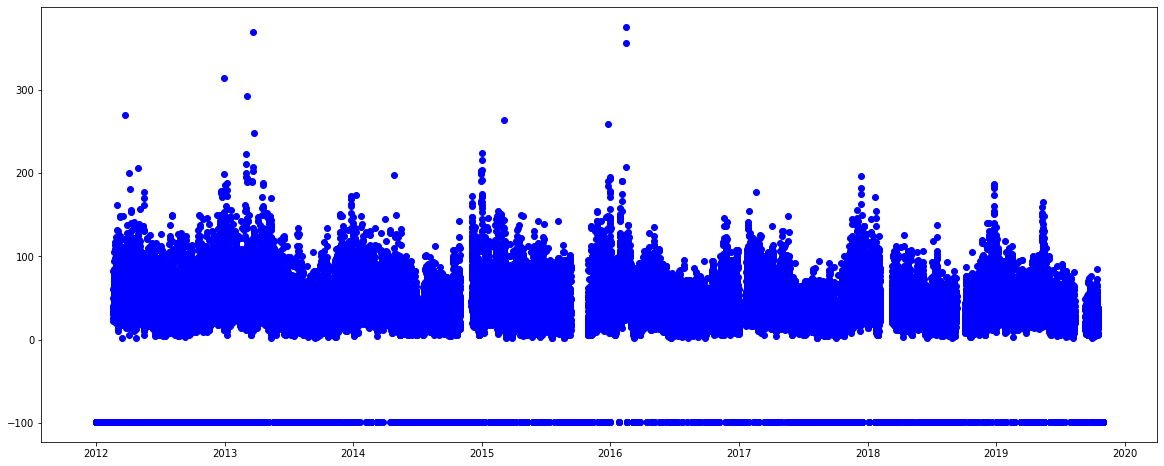

In [15]:
f, ax=plt.subplots(1)
f.set_figheight(8)
f.set_figwidth(20)
ax.scatter(df_cuauh.DATETIME, df_cuauh.HGM, color='b');

In [16]:
df_cuauh[df_cuauh.HGM == -99.0] = None

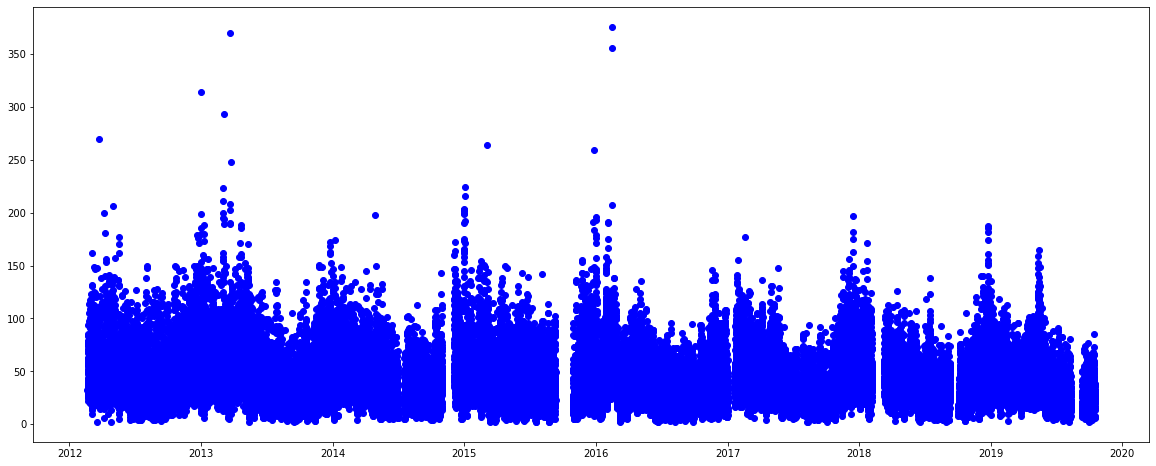

In [17]:
f, ax=plt.subplots(1)
f.set_figheight(8)
f.set_figwidth(20)
ax.scatter(df_cuauh.DATETIME, df_cuauh.HGM, color='b');

In [18]:
df_cuauh[df_cuauh.HGM > 220] = None

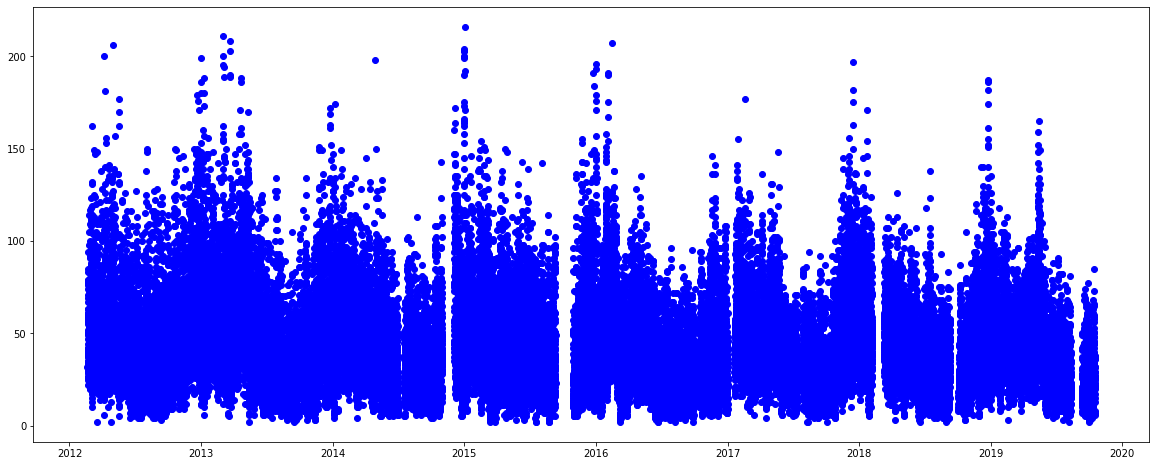

In [19]:
f, ax=plt.subplots(1)
f.set_figheight(8)
f.set_figwidth(20)
ax.scatter(df_cuauh.DATETIME, df_cuauh.HGM, color='b');

## Max/Mean/Mode/Median...?

In [23]:
df_cuauh_2=df_cuauh.set_index('DATETIME')[['HGM']]

In [32]:
cuauh_mean=df_cuauh_2.groupby(pd.TimeGrouper('D')).mean()
cuauh_max=df_cuauh_2.groupby(pd.TimeGrouper('D')).max()
cuauh_median=df_cuauh_2.groupby(pd.TimeGrouper('D')).median()

In [34]:
# cuauh_mean.to_csv("../data_clean/cuauh_pm10_mean_clean_v3.csv")
# cuauh_max.to_csv("../data_clean/cuauh_pm10_max_clean_v3.csv")
# cuauh_median.to_csv("../data_clean/cuauh_pm10_median_clean_v3.csv")